### 머신러닝 프로젝트 A to Z
- 본 실습은 CS231n 2주차 내용과 겹치는 핸즈온 비지도 학습 내용을 가져온 것입니다. (Hands-On Unsupervised Learning Using Python)
- 머신러닝 프로젝트를 가볍게 해보면서 Numpy, Pandas, Scikit-Learn에 대한 숙련도를 키우는 것을 목표로 합니다. 

### 1. 데이터 준비하기

**1-1. 데이터 획득하기**
- 데이터 다운로드
- 라이브러리 가져오기

데이터 다운로드는 데이터 다운로드 링크를 알 수 있다면, wget 명령어로 데이터를 직접적으로 다운받을 수 있습니다. 

In [ ]:
!wget "https://media.githubusercontent.com/media/francis-kang/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv"

--2022-03-19 07:02:20--  https://media.githubusercontent.com/media/francis-kang/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [text/plain]
Saving to: ‘credit_card.csv’

credit_card.csv     100%[===================>] 143.84M   208MB/s    in 0.7s    

2022-03-19 07:02:23 (208 MB/s) - ‘credit_card.csv’ saved [150828752/150828752]



ls 명령어로 다운받은 파일을 확인 할 수 있습니다. (credit_card.csv)

In [ ]:
ls

credit_card.csv  sample_data/


파이썬 라이브러리를 가져옵니다.  

In [ ]:
import numpy as np
import pandas as pd
import os

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

pandas의 read_csv로 다운 받은 credit_card.csv를 읽어옵니다. 

In [ ]:
data = pd.read_csv("./credit_card.csv")

pandas의 head 함수는 읽어온 데이터 프레임의 처음 다섯 행을 보여줍니다. 

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1-2. 데이터 탐색하기(EDA)**
- 통계량 요약
- 피처별로 Null값, 숫자가 아닌 값 보여주기
- 피처별로 가진 고유값을 보여주기

describe() 은 통계량을 요약해주는 pandas 함수 입니다. 빈도, 평균, 사분위수 등을 보여줍니다.

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


여기서 Class 피처는 카드 거래가 사기인지 아닌지 1 또는 0으로 나타냅니다. 1이면 Positive Label이라 부르는데, 이 열(Column)의 합을 구하면 전체 사기 건수를 구할 수 있습니다. 

In [ ]:
print("Number of fraudulent transactions:", data["Class"].sum())

Number of fraudulent transactions: 492


columns은 피처의 이름을 출력해줍니다. 

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

피처별로 숫자가 아닌 Nan의 개수를 구해봅니다. numpy의 isnan은 nan의 개수를 구해주고, sum 함수로 Nan의 개수를 구할 수 있습니다. 

In [ ]:
nanCounter = np.isnan(data).sum()

아래 출력 결과를 통해 NaN이 없다는 것을 알 수 있습니다. 

In [ ]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

피처별로 고유값을 식별합니다. Class를 예로 들었을 때 0과 1밖에 없으므로 2만 출력됩니다. unique함수를 apply에 적용하면 피처별로 unique함수가 적용됩니다. 

In [ ]:
distinctCounter = data.apply(lambda x:len(x.unique()))

In [ ]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

**1.3 피처 행렬 및 레이블 배열 생성하기**
- 피처 행렬 X 및 레이블 배열 Y 생성하기
- 피처 행렬 X 표준화하기

X, y를 분리해줍니다. drop함수로 특정 열을 없앨 수 있습니다. 

In [ ]:
dataX = data.copy().drop(["Class"], axis=1)
dataY = data["Class"].copy()

피처의 평균을 0, 표준 편차가 1이되도록 피처 행렬 X를 표준화합니다. sklearn의 StandardSacler가 그 역할을 합니다. 

In [ ]:
featuresToScale = dataX.drop(["Time"], axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

아래 출력 결과를 통해 정규화가 된 모습을 볼 수 있습니다.

In [ ]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-7.894416e-16,2.647157e-17,-4.302564e-15,-6.662098e-16,-2.586322e-16,4.147497e-16,-8.820879e-16,-2.466016e-16,3.102531e-16,...,2.589559e-16,1.869947e-17,1.494373e-15,-6.977058e-16,1.151050e-16,-7.959207e-16,3.444180e-16,-2.454881e-18,5.251749e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


**1-4. 피처 엔지니어링 및 피처 선택하기**
- 피처간 상관관계 확인
- 데이터 시각화하기

피처간 상관관계 분석을 통해 불필요하게 중복되는 피처를 제거할 수 있습니다. 상관관계 행렬 CorrelationMatrix 는 pandas에서 제공하는 corr 함수로 구할 수 있습니다. 

In [ ]:
dataX.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596
V1,0.117396,1.000000e+00,-1.618238e-16,4.605644e-16,-3.371901e-16,5.047677e-16,7.160993e-16,9.851233e-16,1.485983e-17,-5.368722e-16,...,2.549998e-16,2.753634e-16,2.954974e-16,-4.040542e-16,-3.976821e-17,-1.759196e-15,-2.204321e-16,1.801017e-16,5.265660e-16,-0.227709
V2,-0.010593,-1.618238e-16,1.000000e+00,-1.015606e-15,6.532809e-16,3.896424e-16,1.784204e-16,-2.375146e-16,8.820177e-17,-1.384264e-16,...,7.321562e-16,-1.459235e-16,1.184856e-16,2.000560e-16,-1.829356e-16,7.077090e-16,4.080697e-16,-2.802128e-16,-1.536069e-16,-0.531409
V3,-0.419618,4.605644e-16,-1.015606e-15,1.000000e+00,-1.447976e-15,5.916157e-16,1.974925e-15,2.710600e-15,1.607516e-15,1.969606e-15,...,6.518569e-16,-1.502546e-16,-2.331639e-15,-1.818281e-16,5.773734e-17,1.670390e-15,-6.885233e-16,4.906210e-17,5.784555e-16,-0.210880
V4,-0.105260,-3.371901e-16,6.532809e-16,-1.447976e-15,1.000000e+00,-2.091640e-15,-2.513228e-16,-1.449527e-16,3.430698e-16,8.907889e-16,...,-3.782080e-16,-1.824254e-16,2.722073e-16,1.981572e-16,1.436760e-16,7.701642e-16,-2.450075e-16,-2.149987e-16,-9.386795e-17,0.098732
V5,0.173072,5.047677e-16,3.896424e-16,5.916157e-16,-2.091640e-15,1.000000e+00,1.152310e-15,2.526345e-16,-2.579780e-16,5.451383e-16,...,-5.665563e-16,-5.062985e-17,4.449604e-16,3.206232e-16,-9.749334e-16,-4.620506e-16,3.020648e-16,1.802117e-16,2.939147e-17,-0.386356
V6,-0.063016,7.160993e-16,1.784204e-16,1.974925e-15,-2.513228e-16,1.152310e-15,1.000000e+00,1.143010e-16,-2.552978e-16,2.160477e-16,...,6.927994e-17,-4.276281e-18,2.354977e-16,-2.286140e-16,-1.035833e-15,4.079153e-16,-2.889397e-16,-2.543934e-16,2.623156e-16,0.215981
V7,0.084714,9.851233e-16,-2.375146e-16,2.710600e-15,-1.449527e-16,2.526345e-16,1.143010e-16,1.000000e+00,-3.443484e-16,-1.308500e-15,...,5.991147e-16,2.925795e-16,-4.399790e-16,-1.702045e-16,-2.440111e-17,-5.002461e-16,-7.842940e-16,-2.121702e-15,1.834656e-16,0.397311
V8,-0.036949,1.485983e-17,8.820177e-17,1.607516e-15,3.430698e-16,-2.579780e-16,-2.552978e-16,-3.443484e-16,1.000000e+00,5.521035e-16,...,-1.985332e-17,-3.469211e-16,4.411625e-17,1.239268e-16,-2.875529e-16,-1.156434e-16,1.565045e-16,2.325987e-16,-3.194644e-16,-0.103079
V9,-0.008660,-5.368722e-16,-1.384264e-16,1.969606e-15,8.907889e-16,5.451383e-16,2.160477e-16,-1.308500e-15,5.521035e-16,1.000000e+00,...,-4.502283e-16,1.003985e-16,-6.062372e-16,-5.238255e-16,-2.576836e-16,9.968143e-16,-1.547858e-16,-8.415326e-17,7.169020e-16,-0.044246


다음은 데이터 시각화 단계입니다. 데이터셋에 얼마나 불균형한지 보기 위해 seaborn의 barplot을 이용해 알아봅니다.

Text(0, 0.5, 'Frequency Count')

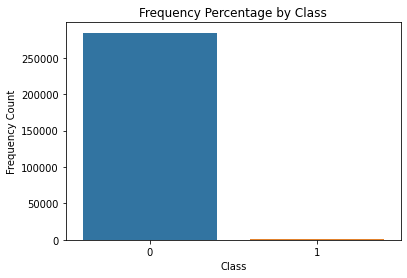

In [ ]:
ax = sns.countplot(x="Class", data=data)
ax.set_title("Frequency Percentage by Class")
ax.set_xlabel("Class")
ax.set_ylabel("Frequency Count")

### 2. 모델 준비하기


**2-1. 훈련 및 테스트 데이터셋으로 분할하기**


훈련용과 테스트 데이터셋을 sklearn의 train_test_split으로 분할합니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=2018, stratify=dataY)

**2-2. 비용 함수 선택하기**

이 예제는 클래스를 2개 가진 지도 학습의 이진 분류 문제입니다.  Cross Entropy를 최소화하는 것으로 문제를 최적화할 수 있습니다. 

**2-3. k-겹 교차검증 데이터셋 생성하기**

sklearn의 StratifiedKFold는 클래스별 비율을 유지하여 샘플링할 수 있도록 해줍니다. 

In [ ]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

**2-4. 로지스틱 회귀 분석**

- 하이퍼파라미터 설정하기
- 모델 훈련시키기
- 모델 평가하기

LogisticRegression에 대한 하이퍼 파라미터를 설정해줍니다. 

- 패널티 : L1와 L2가 있으며 L1패널티에 비하여 L2 패널티는 이상치에 덜 민감합니다. 거의 모든 피처에 0이 아닌 가중치를 할당합니다. 
- C : 값이 작을수록 정규화 강도가 강해져 더 단순한 회귀식이 됩니다. 
- class_weight : "balanced" 는 클래스의 균형을 유지해줍니다. 클래스의 개수에 따라 각 label에 대한 가중치가 달라집니다. 

In [ ]:
penalty="l2"
C=1.0
class_weight = "balanced"
random_state = 2018
solver = "liblinear"

logReg = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, random_state=random_state, solver=solver, n_jobs=-1)

K-cross validation으로 학습을 시켜줍니다. 아래 코드는 K 등분한 train, val의 쌍을 각각 학습시킨 후의 Logloss입니다. 

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0,1])

model = logReg
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
  X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
  model.fit(X_train_fold, y_train_fold)
  loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
  trainingScores.append(loglossTraining)

  predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index, 1])
  cvScores.append(loglossCV)

  print("Training Log Loss: ", loglossTraining)
  print("CV Log Loss : ", loglossCV)

loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print(loglossLogisticRegression)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


Training Log Loss:  0.10975252535420295
CV Log Loss :  0.10894725681432259


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


Training Log Loss:  0.10458714558235355
CV Log Loss :  0.10406600861905216


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


Training Log Loss:  0.11539879849519953
CV Log Loss :  0.11764505207794493


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


Training Log Loss:  0.11562706196771971
CV Log Loss :  0.11819021115002927


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


Training Log Loss:  0.09710464667204792
CV Log Loss :  0.09698425649465511
0.1091665570312008


테스트에 대한 log_loss는 다음과 같습니다. 

In [ ]:
log_loss(y_test, model.predict_proba(X_test))

0.0967528235352516

### 3. 평가 지표

**3-1. 오차 행렬**

참 양성, 참 음성, 거짓 양성, 거짓 음성의 개수를 요약해서 만들 수 있습니다. 

https://en.wikipedia.org/wiki/Confusion_matrix

단순히 정확도로는 클래스가 불균형할 때 정확히 모델을 평가할 수 없습니다. 

**3-2. 정밀도 재현율 곡선**

정밀도(Precision) = TP / (TP + FP)

재현율(Recall) = TP / (TP + FN)

암을 예로 들겠습니다. 

정밀도가 높고 재현율이 낮으면 모델이 예측한 것 중에 실제 암은 많지만, 실제 암을 놓치는 경우가 있습니다. 

재현율이 높고 정밀도가 낮으면 실제 암 중에 모델이 놓치는 건 없지만 암이 아닌데 모델이 암이라고 하는 경우가 많습니다. 

정밀도가 높아지면 재현율이 낮이지고 재현율이 높아지면 정밀도가 낮아지는 Tradeoff 관계를 가집니다. 

따라서 적정 임계값을 찾는 것이 중요합니다. 이러한 관계를 나타낸 곡선을 정밀도-재현율 곡선이라고 합니다. 

**3-3. AuROC Curve**

X축은 Recall, Y축은 Precision인 곡선을 그리고 이 곡선의 아래 면적을 구하여 평균 정밀도(mean Average Precision)를 구할 수 있습니다. 

Text(0.5, 1.0, 'Precision-Recall curve : Average Precision = 0.73')

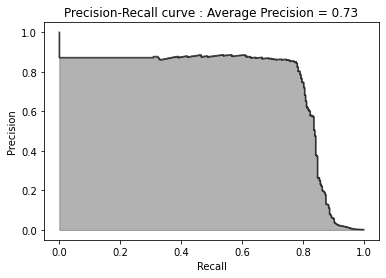

In [ ]:
preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ["trueLabel", "prediction"]
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds["trueLabel"], preds["prediction"])

average_precision = average_precision_score(preds["trueLabel"], preds["prediction"])

plt.step(recall, precision, color="k", alpha=0.7, where="post")

plt.fill_between(recall, precision, step="post", alpha=0.3, color="k")
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.ylim([0.0, 1,00])
#plt.xlim([0.0, 1,00])

plt.title("Precision-Recall curve : Average Precision = {0:0.2f}".format(average_precision))

Average Precision 인 0.73으로 이 곡선의 대표값을 정할 수 있습니다. ROC Curve는 다음과 같이 그릴 수 있습니다. 

Text(0.5, 1.0, 'Receiver operating characteristic: Area Under the curve : 0.97')

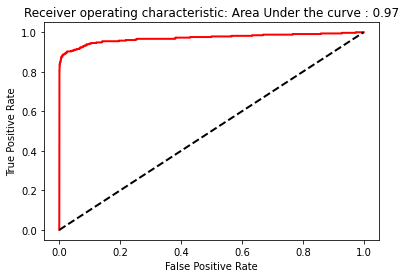

In [ ]:
fpr, tpr, thresholds = roc_curve(preds["trueLabel"], preds["prediction"])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="r", lw=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], color="k", lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("Receiver operating characteristic: Area Under the curve : {0:0.2f}".format(areaUnderROC))

숙제 : 생각해볼만한 거리

1. (코딩) kNN으로 ROC Curve를 그릴 수 있을까? (sklearn kNN으로 학습 후 ROC Curve 그려보기)
2. (고민) 왜 데이터를 0과 1 사이로 정규화를 해주어야 할까?
2. (고민) 왜 l2 penalty가 outlier 제거 관점에서 유리할까?
